## 머신러닝
# PCA
- Principal Component Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

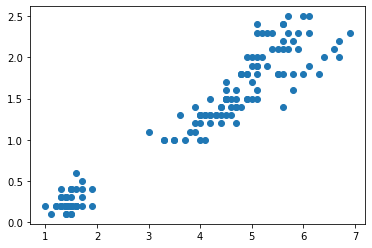

In [3]:
plt.scatter(iris.data[:,2], iris.data[:,3])

### 주성분 찾기
- 정규화 적용이 필요함

In [5]:
X = iris.data[:, [2,3]]
X = (X - X.mean(axis=0)) / X.std(axis=0)
X.shape

(150, 2)

In [6]:
from sklearn.decomposition import PCA

In [7]:
model = PCA()
model.fit(X)

PCA()

In [9]:
cs = model.components_
cs

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

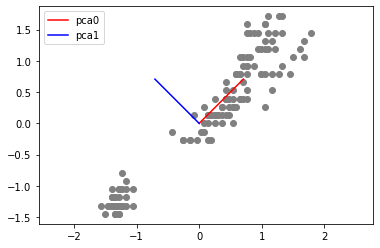

In [15]:
plt.scatter(X[:,0], X[:,1], c='gray')
plt.plot([0,cs[0,0]], [0,cs[0,1]], 'r', label='pca0')
plt.plot([0,cs[1,0]], [0,cs[1,1]], 'b', label='pca1')
plt.axis('equal')
plt.legend()

### 데이터 변환
- 주성분을 새로운 축으로 삼아 변환

In [16]:
X_pca = model.transform(X)
X_pca.shape

(150, 2)

(-2.310428434830964,
 2.5061897041457746,
 -0.6101121917529887,
 0.6347916346986904)

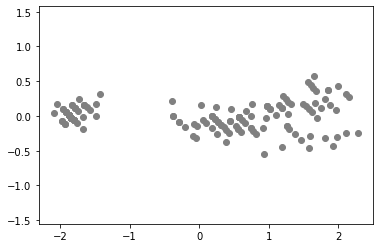

In [17]:
plt.scatter(X_pca[:,0], X_pca[:,1], c='gray')
plt.axis('equal')

### 유방암 데이터에 적용

In [18]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [19]:
X = cancer.data # 30개 속성
X = (X - X.mean(axis=0)) / X.std(axis=0) # 정규화
X.shape

(569, 30)

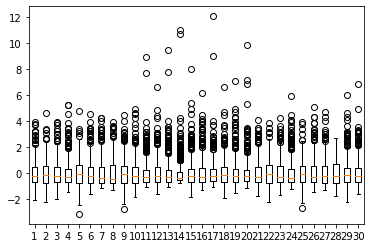

In [21]:
plt.boxplot(X)
pass

In [22]:
model = PCA(2) # 주성분을 2개만 찾음
model.fit(X)

PCA(n_components=2)

In [23]:
model.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [24]:
X_pca = model.transform(X)
X_pca.shape

(569, 2)

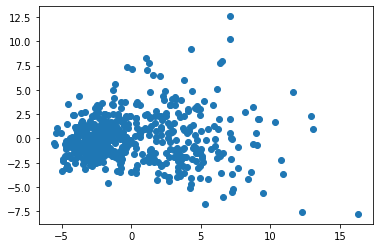

In [26]:
plt.scatter(X_pca[:,0], X_pca[:,1])

### 주성분과 상관계수와의 비교검토

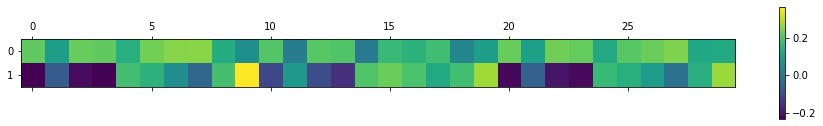

In [31]:
plt.matshow(model.components_)
plt.colorbar()

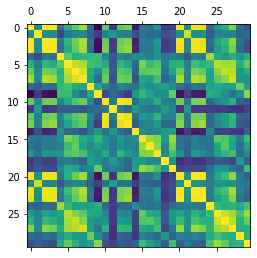

In [29]:
mat = np.corrcoef(cancer.data.T)
plt.matshow(mat)

### MNIST 적용

In [34]:
from sklearn.datasets import load_digits

mnist = load_digits()
display(mnist.keys(), mnist.data.shape)

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

(1797, 64)

In [35]:
mnist.images.shape

(1797, 8, 8)

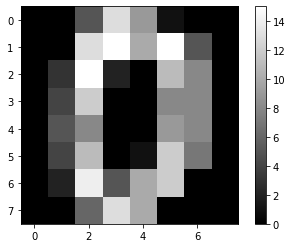

In [37]:
plt.imshow(mnist.images[0], cmap='gray')
plt.colorbar()

In [38]:
mnist.data.max()

16.0

In [39]:
pca = PCA()
pca.fit(mnist.data)

PCA()

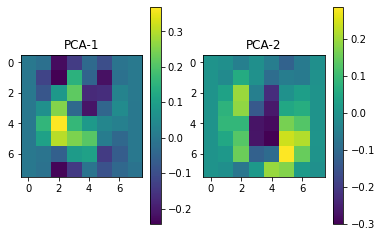

In [40]:
pca1, pca2 = pca.components_[:2]

plt.subplot(1,2,1)
plt.imshow(pca1.reshape(8,8))
plt.title('PCA-1')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(pca2.reshape(8,8))
plt.title('PCA-2')
plt.colorbar()

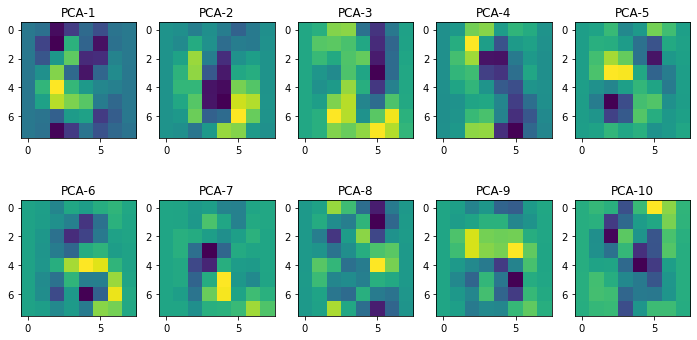

In [41]:
plt.figure(figsize=[12,6])

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(pca.components_[i].reshape(8,8))
    plt.title('PCA-'+str(i+1))

- 이미지 복원

In [44]:
X_pca = pca.transform(mnist.data)
X_pca.shape

(1797, 64)

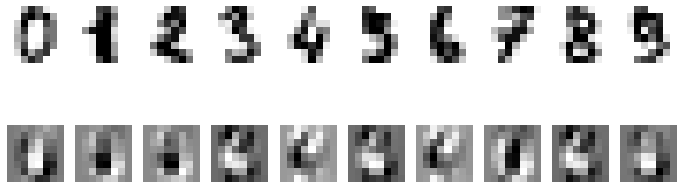

In [46]:
N = 2
recovered = np.matmul(X_pca[:,:N], pca.components_[:N])

plt.figure(figsize=[12,4])
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(mnist.images[i], cmap='gray_r')
    plt.axis('off')

    plt.subplot(2,10,10+i+1)
    plt.imshow(recovered[i].reshape(8,8), cmap='gray_r')
    plt.axis('off')

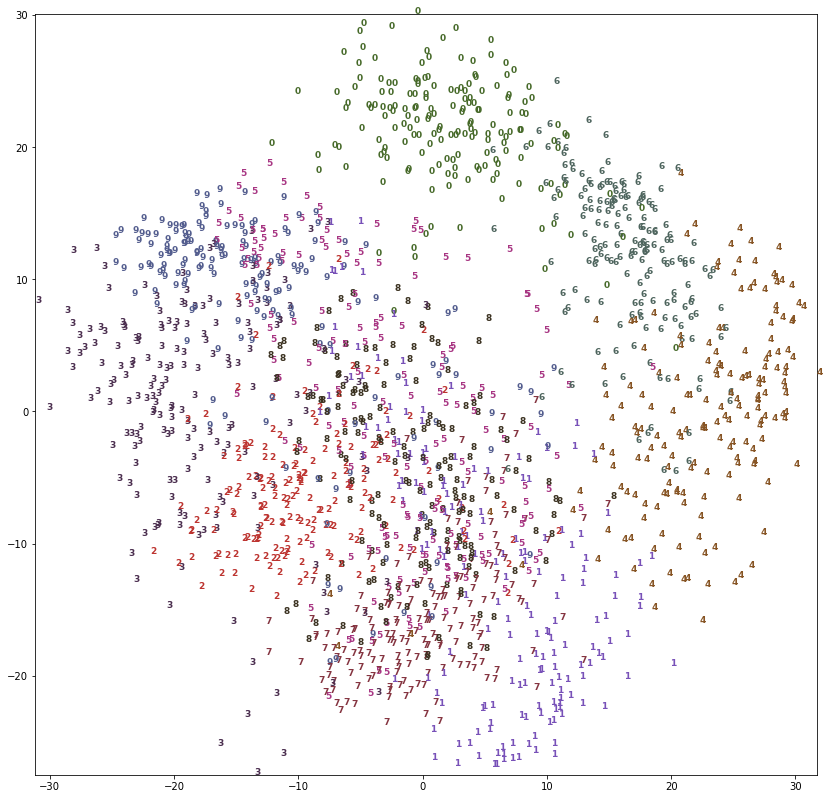

In [47]:
xmax, ymax = X_pca[:,:2].max(axis=0)
xmin, ymin = X_pca[:,:2].min(axis=0)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=[14,14])
plt.xlim([xmin,xmax])
plt.ylim([ymin,ymax])
for i in range(len(X_pca)):
    plt.text(X_pca[i,0], X_pca[i,1], str(mnist.target[i]),
             color=colors[mnist.target[i]], fontdict={'weight':'bold', 'size':9})